In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the CSV file 'housing.csv' into a DataFrame

data = pd.read_csv('housing.csv')

In [3]:
# Displaying the first 5 rows of the DataFrame to inspect the data

data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
# Display concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
# Generating descriptive statistics for the DataFrame

data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
# Display the number of missing values (NaN) in each column of the DataFrame

data.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [7]:
# Display the count of duplicate rows in the DataFrame

data.duplicated().sum()

0

In [8]:
# Extract the 'MEDV' column, convert its values to integers, and assign it to 'y'
y = data['MEDV'].astype(int)

# Drop the 'MEDV' column from the DataFrame 'data' to get the feature variables, and assign the result to 'X'
X = data.drop(['MEDV'], axis=1)


In [9]:
X

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [10]:
y

0      504000
1      453600
2      728700
3      701400
4      760200
        ...  
484    470400
485    432600
486    501900
487    462000
488    249900
Name: MEDV, Length: 489, dtype: int32

## Data Visualisation 

In [11]:
import seaborn as sns

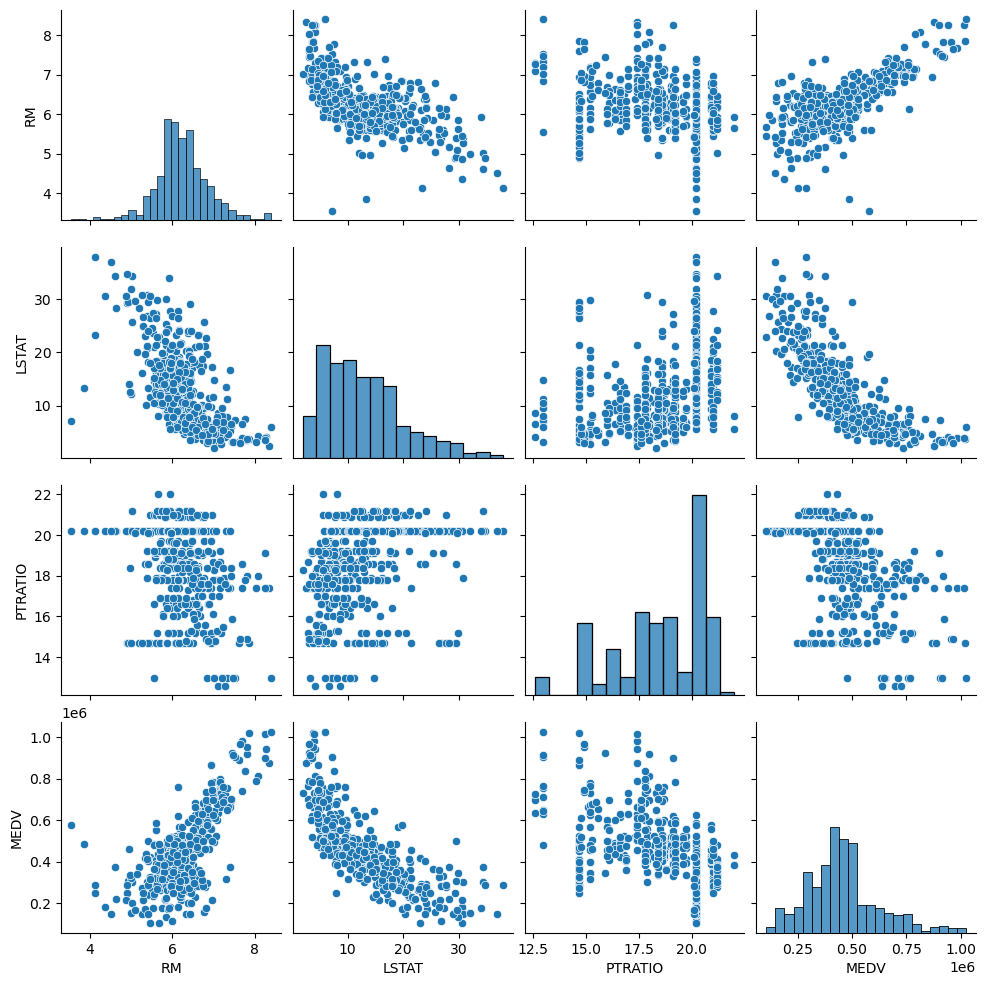

In [12]:
sns.pairplot(data)

## Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Fit the StandardScaler to the feature data 'X' and transform 'X' to scale the features

scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)

In [15]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=42)

## Linear Regression

In [16]:
# Create an instance of the LinearRegression model

lr = LinearRegression()

In [17]:
# Fit the model to the training data

lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Use the trained model to make predictions on the testing feature data

y_pred = lr.predict(X_test)

In [19]:
lr.coef_

array([ 56147.41699258, -75138.29845742, -40757.26134871])

In [20]:
lr.intercept_

457694.55804207415

In [21]:
# Calculate and print the mean squared error of the model's predictions

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6789025559.26589


In [22]:
# Calculate and print the R-squared value of the model's predictions

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.6910934003098511


## Decision Tree 

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
dt = DecisionTreeRegressor(random_state=42)

In [25]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
y_pred_dr = dt.predict(X_test)

In [27]:
mse_dt = mean_squared_error(y_test, y_pred_dr)
print(f"Mean Squared Error: {mse_dt}")

Mean Squared Error: 6396165000.0


In [28]:
r2_dt = r2_score(y_test, y_pred_dr)
print(f"R-squared: {r2_dt}")

R-squared: 0.7089688992980032


## Gradient Boosting Regressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
gbr = GradientBoostingRegressor(n_estimators=100)

In [31]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [32]:
y_pred_gbr = gbr.predict(X_test)

In [33]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f"Mean Squared Error: {mse_gbr}")

Mean Squared Error: 3377373229.546287


In [34]:
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"R-squared: {r2_gbr}")

R-squared: 0.8463265646717504


## Support Vector Regression

In [35]:
from sklearn.svm import SVR

In [36]:
svr = SVR()

In [37]:
svr.fit(X_train, y_train)

SVR()

In [38]:
y_pred_svr = svr.predict(X_test)

In [39]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"Mean Squared Error: {mse_svr}")

Mean Squared Error: 22386757917.393967


In [40]:
r2_svr = r2_score(y_test, y_pred_svr)
print(f"R-squared: {r2_svr}")

R-squared: -0.01861706160618226


## K-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
knn = KNeighborsRegressor(n_neighbors=5)

In [43]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [44]:
y_pred_knn = knn.predict(X_test)

In [45]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error: {mse_knn}")

Mean Squared Error: 4048052400.0


In [46]:
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R-squared: {r2_knn}")

R-squared: 0.815810075932788


## Random Forest


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfr = RandomForestRegressor(n_estimators=100)

In [49]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
y_pred_rfr = rfr.predict(X_test)

In [51]:
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print(f"Mean Squared Error: {mse_rfr}")

Mean Squared Error: 3330959625.0


In [52]:
r2_rf = r2_score(y_test, y_pred_rfr)
print(f"R-squared: {r2_rf}")

R-squared: 0.848438424265531


## Ridge Regression

In [53]:
from sklearn.linear_model import Lasso

In [54]:
lss = Lasso(alpha=0.1)

In [55]:
lss.fit(X_train, y_train)

Lasso(alpha=0.1)

In [56]:
y_pred_lss = lss.predict(X_test)

In [57]:
mse_lss = mean_squared_error(y_test, y_pred_lss)
print(f"Mean Squared Error: {mse_lss}")

Mean Squared Error: 6789027258.932536


In [58]:
r2_lss = r2_score(y_test, y_pred_lss)
print(f"R-squared: {r2_lss}")

R-squared: 0.6910933229735324


## Ridge Regressor

In [59]:
from sklearn.linear_model import Ridge

In [60]:
rdg = Ridge(alpha=1.0)

In [61]:
rdg.fit(X_train, y_train)

Ridge()

In [62]:
y_pred_rdg = rdg.predict(X_test)

In [63]:
mse_rdg = mean_squared_error(y_test, y_pred_rdg)
print(f"Mean Squared Error: {mse_rdg}")

Mean Squared Error: 6791921929.524183


In [64]:
r2_rdg = r2_score(y_test, y_pred_rdg)
print(f"R-squared: {r2_rdg}")

R-squared: 0.6909616129303335
